In [2]:
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["figure.dpi"] = 100
import plotly.graph_objects as go
from scipy.optimize import fsolve
# import warnings
# warnings.filterwarnings("error")
# import pyvista as pv

In [15]:
def F(Y: np.ndarray, K, f, a, b) -> np.ndarray:
    N = (Y.shape[0]) // 2
    X = Y[:N]
    U = Y[N:2*N]
    C = Y[2*N]

    Yr = np.zeros(2*N+1)
    # # fill first equation batch
    # E1 = np.zeros(N-1)
    # E1rhs = 1/(N-1)*sum(map(lambda i: np.sqrt(1+4/(X[i]**2*X[i+1]**2)*(X[i]*(U[i+1]-C)-X[i+1]*(U[i]-C))**2)*(X[i+1]-X[i]), range(0, N-2+1, 1)))
    # for n in range(0, N-2+1, 1):
    #     E1[n] = np.sqrt(1+4/(X[n]**2*X[n+1]**2)*(X[n]*(U[n+1]-C)-X[n+1]*(U[n]-C))**2)*(X[n+1]-X[n]) - E1rhs
    # fill first equation batch
    E1 = np.zeros(N-1)
    E1rhs = 1/(N-1)*sum(map(lambda i: np.sqrt((U[i+1]-U[i])**2+(X[i+1]-X[i])**2), range(0, N-2+1, 1)))
    for n in range(0, N-2+1, 1):
        E1[n] = (U[n+1]-U[n])**2 + (X[n+1]-X[n])**2 - E1rhs**2
    # fill second equation batch
    E2 = np.zeros(N-2)
    for n in range(1, N-2+1, 1):
        E2[n-1] = ((K(U[n])+K(U[n+1]))/2*(U[n+1]-U[n])/(X[n+1]-X[n])-(K(U[n-1])+K(U[n]))/2*(U[n]-U[n-1])/(X[n]-X[n-1])) / \
            ((X[n+1]+X[n])/2-(X[n]+X[n-1])/2)+f(U[n], X[n])
    # fill boundary values
    E3 = np.array(
        [U[0]-1, U[N-1]-10, X[0]-a, X[N-1]-b]
    )

    # Yr = np.zeros(2*N+1)
    # Yr[:N-1] = E1
    # Yr[N-1:N-1+N-2] = E2
    # Yr[N-1+N-2:] = E3

    return np.concatenate((E1, E2, E3))

In [16]:
T = 1

l = 1

a = 1
b = 2

h = 0.01
tau = 0.005

M = int(T/tau) + 1
N = int((b-a)/h) + 1

X = np.linspace(a, b, N)
U = np.random.rand(N)
# U = np.zeros((M, N))

# Kuxt = lambda u, x, t: u**2
# K = lambda m, n: Kuxt(U[m][n], n*h, m*tau)
K = lambda u: u ** 2
f = lambda u, x: 0#np.sin(x)

# for n in range(N):
#     U[0][n] = 0
    # U[0][n] = -40*((n*h)-0.5)**2+10
    # U[0][n] = 10*np.sin(10*n*h)

C = 1
# for m in range(1, M):
    
Y = np.concatenate((X, U, [C]))
Yr = fsolve(F, Y, args=(K, f, a, b))
X = Yr[:N]
U = Yr[N:2*N]
C = Yr[2*N]

In [17]:
Y, X, C

(array([1.00000000e+00, 1.01000000e+00, 1.02000000e+00, 1.03000000e+00,
        1.04000000e+00, 1.05000000e+00, 1.06000000e+00, 1.07000000e+00,
        1.08000000e+00, 1.09000000e+00, 1.10000000e+00, 1.11000000e+00,
        1.12000000e+00, 1.13000000e+00, 1.14000000e+00, 1.15000000e+00,
        1.16000000e+00, 1.17000000e+00, 1.18000000e+00, 1.19000000e+00,
        1.20000000e+00, 1.21000000e+00, 1.22000000e+00, 1.23000000e+00,
        1.24000000e+00, 1.25000000e+00, 1.26000000e+00, 1.27000000e+00,
        1.28000000e+00, 1.29000000e+00, 1.30000000e+00, 1.31000000e+00,
        1.32000000e+00, 1.33000000e+00, 1.34000000e+00, 1.35000000e+00,
        1.36000000e+00, 1.37000000e+00, 1.38000000e+00, 1.39000000e+00,
        1.40000000e+00, 1.41000000e+00, 1.42000000e+00, 1.43000000e+00,
        1.44000000e+00, 1.45000000e+00, 1.46000000e+00, 1.47000000e+00,
        1.48000000e+00, 1.49000000e+00, 1.50000000e+00, 1.51000000e+00,
        1.52000000e+00, 1.53000000e+00, 1.54000000e+00, 1.550000

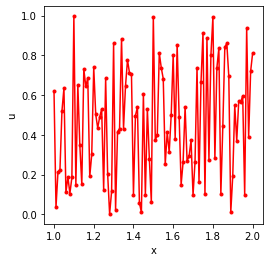

In [18]:
# UX[N:2*N]
# plt.scatter(x=UX[N:2*N], y=UX[:N], s=2)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(X, U, '.r-')
# plt.xlim(0, 1)
# plt.ylim(-0.5, 0.5)
ax.set_aspect('equal', adjustable='box')

plt.xlabel("x")
plt.ylabel("u")

plt.show()